In [95]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Read input data using pandas
df=pd.read_csv('day.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [97]:
## Dropping redundant or unnecessary info from the data
#drop instant col because it looks like an indexing column
df.drop(['instant'], axis = 1, inplace = True)
# drop dteday column as month and weekday columns are available directly in the data
df.drop(['dteday'], axis = 1, inplace = True)
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [101]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [103]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [105]:
### Check for Null Values
df.isnull().sum()
## Observation: No null values identified

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [107]:
### Handling Outliers
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [109]:
# Print number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

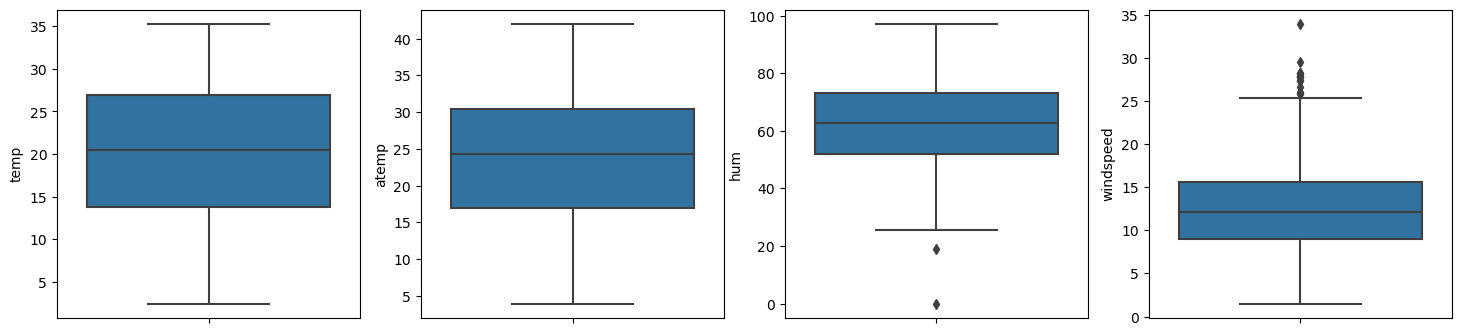

In [111]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

## Observation: From the below plots, we identify no outliers in the given data set

In [113]:
# Converting season and weathersit to categorical types

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1500x3000 with 0 Axes>

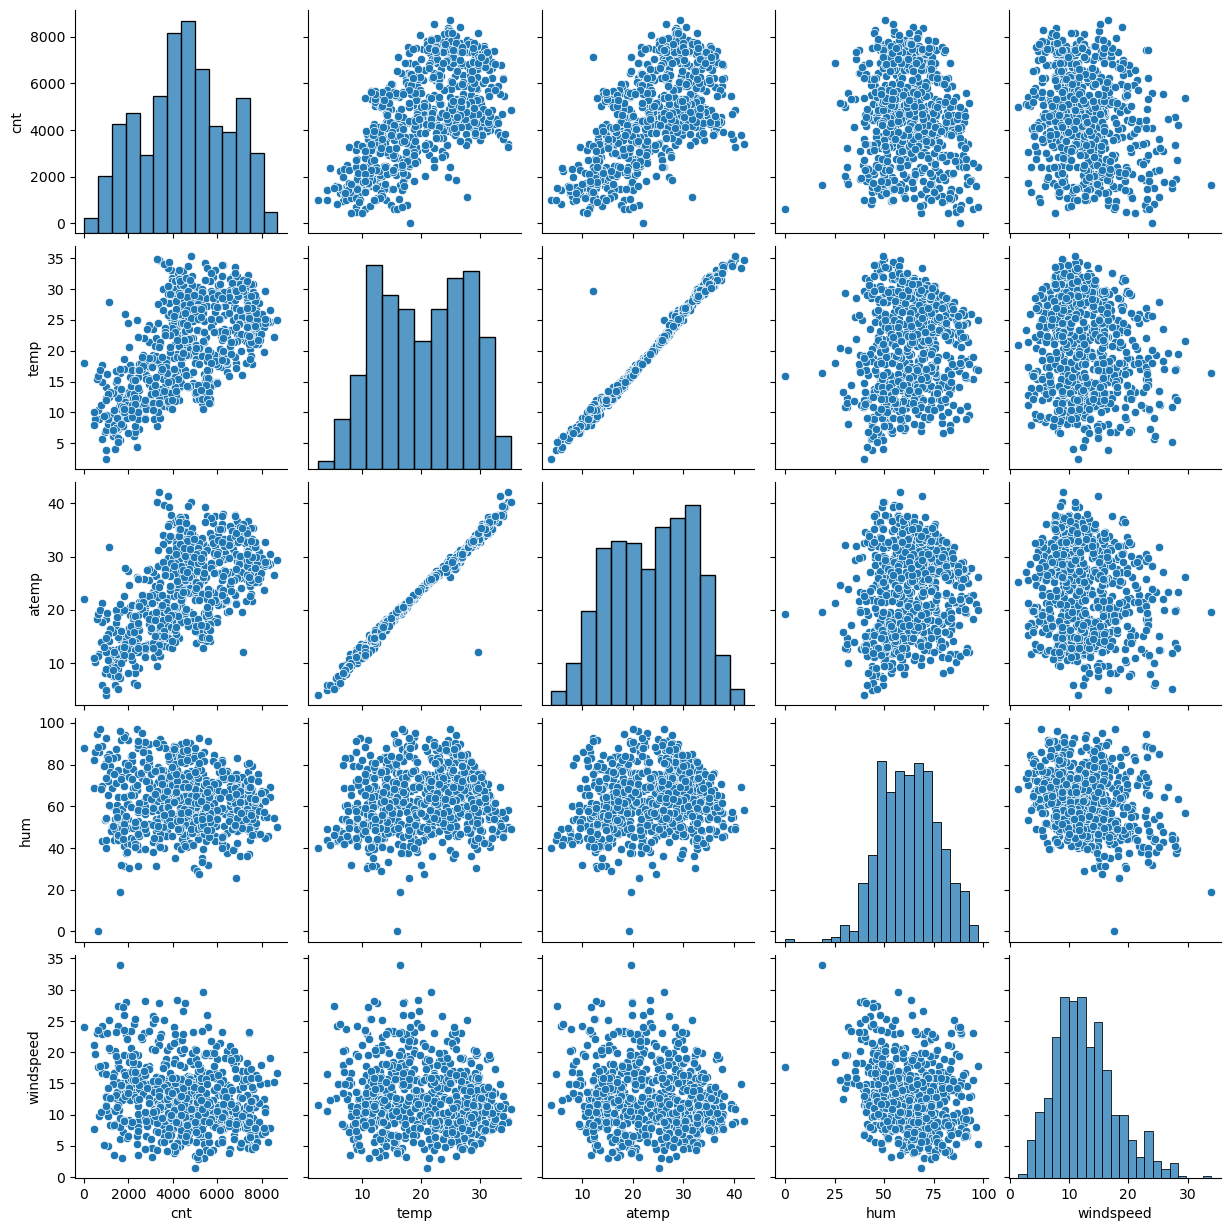

In [115]:
# Drawing pair plots for continuous numeric variables using seaborn

plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Observation: temp and atemp are highly co-related with each other

##  Output variable has a linear relationship with variables like temp, atemp ##

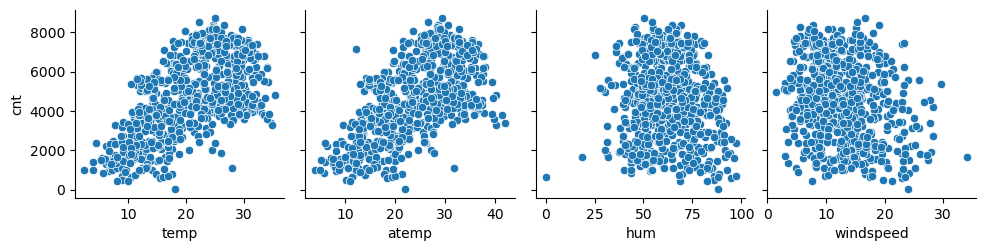

In [117]:
#Visualizing the data using pairplot for numeric variables
sns.pairplot(data=df,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

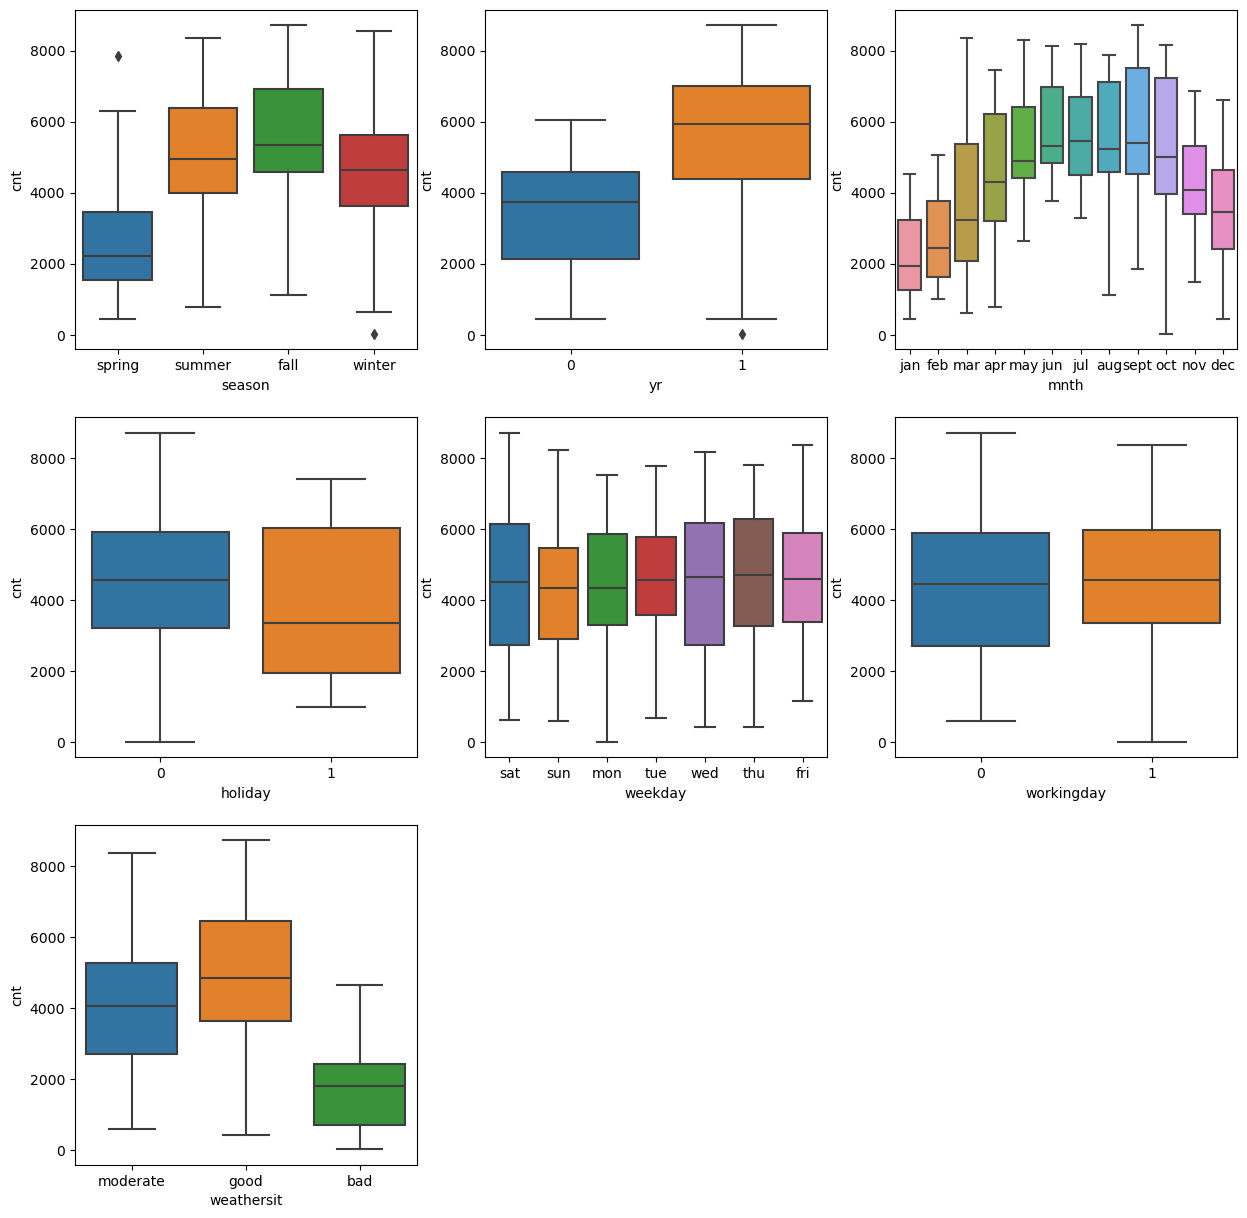

In [119]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show

## Observations:  Bike demand is significantly high on summer and fall seasons and when there are no holidays.
## bike demand was more in 2019 compared to 2018.

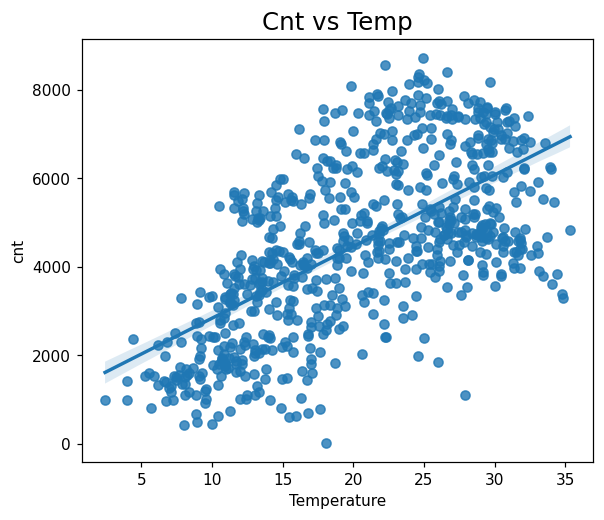

In [121]:
## Scatter plot between cnt and temperature

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()
## Observation:  cnt is linearly increasing with temp indicating linear relation

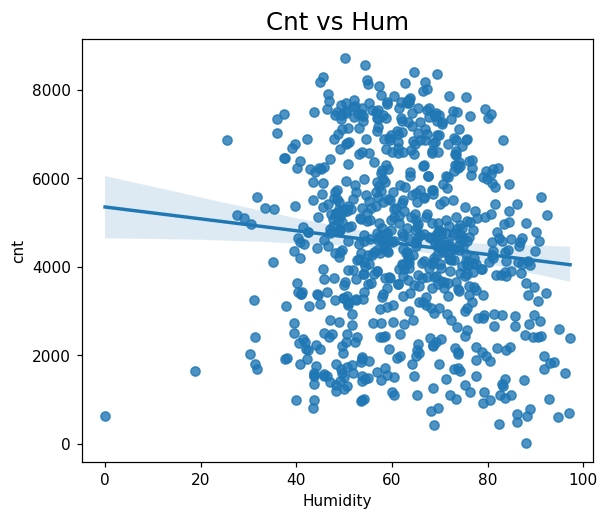

In [123]:
## Scatter plot between cnt and hum

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

##Observation: cnt is decreasing with increase in humidity

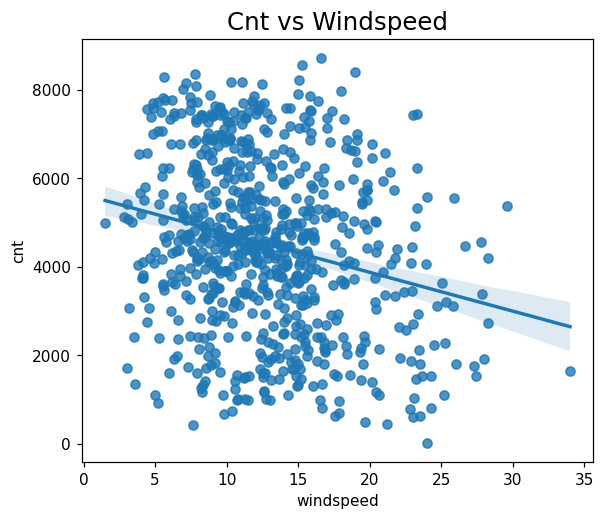

In [125]:
## Scatter plot between cnt and windspeed

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

## Observation: cnt is decreasing with increase in windspeed

In [127]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [129]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'Clear',2:'Mist & Cloudy',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sunday',1: 'monday',2: 'tuesday',3: 'wednesday',4: 'thursday',5: 'friday',6: 'saturday'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [131]:
#Creating dummy variables for season, mnth, weekday, weathersit

d = df[['season','mnth','weekday','weathersit']]
d = pd.get_dummies(d,drop_first=True )

In [133]:
#Concatenating dummy variables to the actual dataset and displaying the same & dropping the columns out of which dummy variables were created.

df = pd.concat([d,df],axis = 1)
df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
df.head()


,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [135]:
#df=df.astype(str)
df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
### Creating a model & training it

#Split the data into training and testing set (7:3).

bike_train, bike_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [141]:
#Rescaling the training dataset to build a model. Since dummy variables are already between 0 & 1, scaling would be done to the variables except the dummy ones.
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

num_vars = ['cnt','temp','atemp','hum','windspeed']
bike_train[num_vars] = scaling.fit_transform(bike_train[num_vars])
bike_train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,False,False,True,False,False,False,False,False,False,False,...,True,False,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,False,False,False,False,False,False,False,True,False,False,...,True,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,True,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


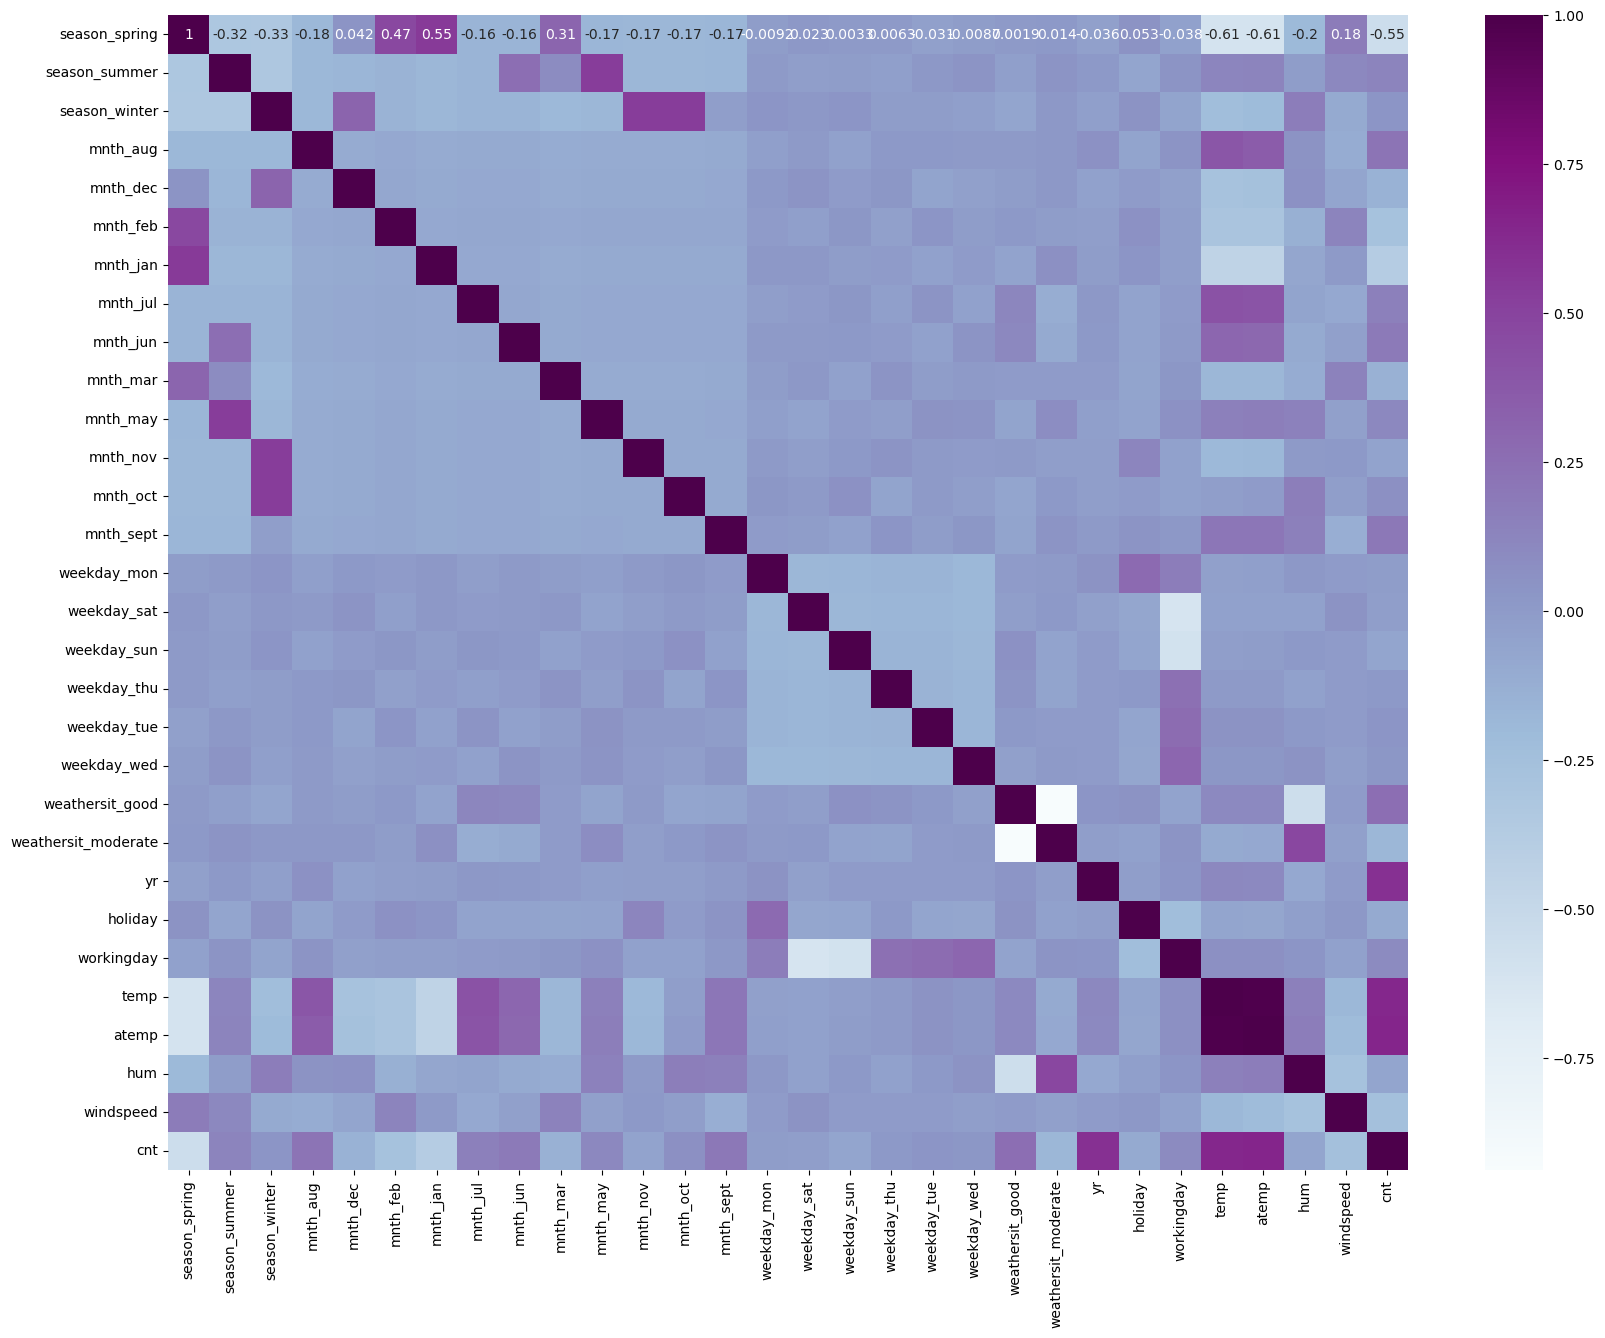

In [143]:
#Building the correlation matrix to check the variables highly correlated to 'cnt'.

plt.figure(figsize = (20, 15))
sns.heatmap(bike_train.corr(), annot = True, cmap="BuPu")
plt.show()

In [145]:
#Dividing the training data into x and Y to build the model
y_train = bike_train.pop('cnt')
X_train = bike_train

In [151]:
#We are going to use statsmodel to build the model but if we don't add a constant, statsmodel would build a line passing through origin which is not wanted.
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

#RFE for 15 variables
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#Print columns produced by RFE that can be used for elimination in the future.
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [153]:
X_train.columns[~rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [521]:
#Build a model with all variables
X_train_rfe = sm.add_constant(X_train_rfe)

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_rfe=scale.fit_transform(X_train_rfe)

## Create and fit the model
lr = sm.OLS(y_train,X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              5.282
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                    2.14e-09
Time:                        05:44:02   Log-Likelihood:                         -392.96
No. Observations:                 510   AIC:                                      813.9
Df Residuals:                     496   BIC:                                      873.2
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1            -0.0451      0.037     -1.205      0.229      -0.119       0.028
x2             0.0273      0.031      0.870      0.385      -0.034       0.089
x3            -0.0178      0.027     -0.664      0.507      -0.070       0.035
x4             0.0158      0.025      0.639      0.523      -0.033       0.064
x5          5.156e+12   4.39e+12      1.174      0.241   -3.47e+12    1.38e+13
x6          4.991e+12   4.25e+12      1.174      0.241   -3.36e+12    1.33e+13
x7             0.1229      0.075      1.632      0.103      -0.025       0.271
x8             0.0914      0.070      1.307      0.192      -0.046       0.229
x9             0.1156      0.024      4.843      0.000       0.069       0.163
x10         2.246e+12   1.91e+12      1.174      0.241   -1.51e+12       6e+12
x11         6.667e+12   5.68e+12      1.174      0.241   -4.49e+12    1.78e+13
x12            0.0818      0.161      0.509      0.611      -0.234       0.398
x13            0.0273      0.159      0.172      0.864      -0.285       0.340
x14           -0.0217      0.032     -0.668      0.504      -0.085       0.042
x15           -0.0275      0.026     -1.070      0.285      -0.078       0.023
==============================================================================
Omnibus:                       61.842   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.750
Skew:                          -0.661   Prob(JB):                     1.22e-30
Kurtosis:                       5.175   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#### Conclusion #####

#### cnt=0.2466+0.4376∗temp+0.2342∗yr+0.0886∗Winter+0.0332∗Summer+0.0682∗September+0.05∗Spring−0.002∗Dec−0.041∗Nov−0.0502∗Jan−0.0503∗
#### July−0.0814∗Cloudy−0.0919∗Holiday−0.1585∗Windspeed−0.2928∗Rain   ####

####
# The positive coefficients imply the factors which, on increasing, would lead to the increase in count and the negative coefficients imply that the factors with negative coeff. on increase, would lead to the decrease in total count.
# By looking at the equation, we can imply that temperature is a major deciding factor of the count followed by the year and season (Winter and summer), where the curve is with positive coefficient.

# The rental count drops during holidays and fall season ####